In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dataset = r'/content/drive/MyDrive/ML_Gigs/TimeSeries.csv'

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv(dataset)

In [41]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [42]:
df.drop(['Year','Month'],axis=1,inplace=True)
# remove the space before column name
df.rename(columns = {' Sales':'Sales'}, inplace = True)
# Convert the "Sales" column to numeric
df["Sales"] = pd.to_numeric(df["Sales"].str.replace(',', ''))

In [43]:
df

,Sales,Date
0,10827,2005-01-01
1,12049,2005-02-01
2,18298,2005-03-01
3,17834,2005-04-01
4,16480,2005-05-01
...,...,...
148,31739,2017-05-01
149,30315,2017-06-01
150,25046,2017-07-01
151,23285,2017-08-01


In [44]:
df.set_index('Date',inplace=True)

In [45]:
df

,Sales
Date,
2005-01-01,10827
2005-02-01,12049
2005-03-01,18298
2005-04-01,17834
2005-05-01,16480
...,...
2017-05-01,31739
2017-06-01,30315
2017-07-01,25046


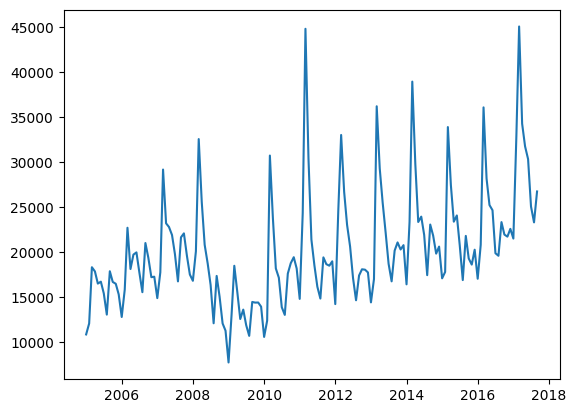

In [46]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Sales'])

In [47]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [48]:

# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [49]:
sales_list = df['Sales'].tolist()

In [50]:
sales_list

[10827,
 12049,
 18298,
 17834,
 16480,
 16690,
 15389,
 13031,
 17849,
 16662,
 16458,
 15280,
 12767,
 15805,
 22685,
 18100,
 19699,
 19948,
 17719,
 15523,
 20987,
 19355,
 17190,
 17245,
 14865,
 17735,
 29156,
 23179,
 22767,
 21879,
 19753,
 16723,
 21623,
 22062,
 19560,
 17489,
 16788,
 20063,
 32544,
 25563,
 20791,
 18710,
 16326,
 12067,
 17331,
 15030,
 12049,
 11243,
 7709,
 13009,
 18459,
 15516,
 12540,
 13586,
 11855,
 10666,
 14437,
 14366,
 14375,
 13913,
 10551,
 12357,
 30712,
 23738,
 18163,
 17131,
 13856,
 12998,
 17592,
 18740,
 19411,
 18150,
 14778,
 24326,
 44803,
 30389,
 21376,
 18488,
 16132,
 14817,
 19393,
 18639,
 18469,
 18955,
 14199,
 24637,
 33000,
 26674,
 23006,
 20597,
 17100,
 14625,
 17379,
 18068,
 18025,
 17719,
 14391,
 16986,
 36190,
 29285,
 25487,
 22105,
 18679,
 16729,
 20146,
 21055,
 20270,
 20752,
 16396,
 23346,
 38932,
 29795,
 23326,
 23922,
 21888,
 17416,
 23041,
 21818,
 19810,
 20592,
 17063,
 17772,
 33879,
 27413,
 23361,
 

In [51]:
# define input sequence
timeseries_data = sales_list
# choose a number of time steps
n_steps = 12
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [52]:

print(X),print(y)

[[10827 12049 18298 ... 16662 16458 15280]
 [12049 18298 17834 ... 16458 15280 12767]
 [18298 17834 16480 ... 15280 12767 15805]
 ...
 [19853 19571 23312 ... 34248 31739 30315]
 [19571 23312 21928 ... 31739 30315 25046]
 [23312 21928 21697 ... 30315 25046 23285]]
[12767 15805 22685 18100 19699 19948 17719 15523 20987 19355 17190 17245
 14865 17735 29156 23179 22767 21879 19753 16723 21623 22062 19560 17489
 16788 20063 32544 25563 20791 18710 16326 12067 17331 15030 12049 11243
  7709 13009 18459 15516 12540 13586 11855 10666 14437 14366 14375 13913
 10551 12357 30712 23738 18163 17131 13856 12998 17592 18740 19411 18150
 14778 24326 44803 30389 21376 18488 16132 14817 19393 18639 18469 18955
 14199 24637 33000 26674 23006 20597 17100 14625 17379 18068 18025 17719
 14391 16986 36190 29285 25487 22105 18679 16729 20146 21055 20270 20752
 16396 23346 38932 29795 23326 23922 21888 17416 23041 21818 19810 20592
 17063 17772 33879 27413 23361 24053 20717 16870 21780 19271 18590 20243
 17017

(None, None)

In [53]:
X.shape

(141, 12)

In [54]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [55]:
X.shape

(141, 12, 1)

Building LSTM Model

In [56]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
5/5 [==============================] - 3s 14ms/step - loss: 594440320.0000
Epoch 2/300
5/5 [==============================] - 0s 14ms/step - loss: 538881408.0000
Epoch 3/300
5/5 [==============================] - 0s 18ms/step - loss: 467673024.0000
Epoch 4/300
5/5 [==============================] - 0s 16ms/step - loss: 411009664.0000
Epoch 5/300
5/5 [==============================] - 0s 15ms/step - loss: 352036928.0000
Epoch 6/300
5/5 [==============================] - 0s 20ms/step - loss: 317990112.0000
Epoch 7/300
5/5 [==============================] - 0s 14ms/step - loss: 298025088.0000
Epoch 8/300
5/5 [==============================] - 0s 15ms/step - loss: 295755360.0000
Epoch 9/300
5/5 [==============================] - 0s 21ms/step - loss: 244889296.0000
Epoch 10/300
5/5 [==============================] - 0s 22ms/step - loss: 200236128.0000
Epoch 11/300
5/5 [==============================] - 0s 37ms/step - loss: 173173744.0000
Epoch 12/300
5/5 [=======================

Predicting For the next 10 data

In [58]:
inp = sales_list[-12:] 

In [ ]:
sales_list

In [60]:
from numpy import array

In [62]:
# demonstrate prediction for next 10 days
x_input = array(inp)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>12):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[25520.578]
1 day input [21697.       22563.       21486.       32938.       45061.
 34248.       31739.       30315.       25046.       23285.
 26721.       25520.578125]
1 day output [[27218.033]]
2 day input [22563.         21486.         32938.         45061.
 34248.         31739.         30315.         25046.
 23285.         26721.         25520.578125   27218.03320312]
2 day output [[28857.133]]
3 day input [21486.         32938.         45061.         34248.
 31739.         30315.         25046.         23285.
 26721.         25520.578125   27218.03320312 28857.1328125 ]
3 day output [[32896.168]]
4 day input [32938.         45061.         34248.         31739.
 30315.         25046.         23285.         26721.
 25520.578125   27218.03320312 28857.1328125  32896.16796875]
4 day output [[40046.043]]
5 day input [45061.         34248.         31739.         30315.
 25046.         23285.         26721.         25520.578125
 27218.03320312 28857.1328125  32896.16796875 40046.0429

In [ ]:
timeseries_data

In [64]:
len(timeseries_data)

153

In [69]:
df

,Sales
Date,
2005-01-01,10827
2005-02-01,12049
2005-03-01,18298
2005-04-01,17834
2005-05-01,16480
...,...
2017-05-01,31739
2017-06-01,30315
2017-07-01,25046


In [65]:
lst_output

[25520.578,
 27218.033,
 28857.133,
 32896.168,
 40046.043,
 41669.137,
 35841.555,
 34554.22,
 30571.998,
 30275.389]

Visualizaing The Output

In [66]:
import matplotlib.pyplot as plt

In [67]:
day_new=np.arange(1,154)
day_pred=np.arange(154,164)

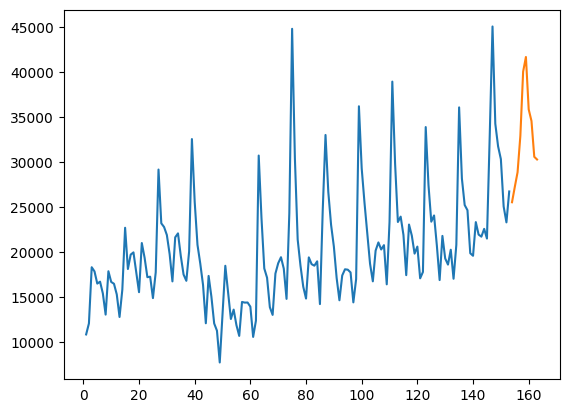

In [68]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)

In [72]:
new_sales = my_list = [int(i) for i in lst_output]
new_sales

[25520, 27218, 28857, 32896, 40046, 41669, 35841, 34554, 30571, 30275]

In [74]:
new_data = pd.DataFrame({'Sales': new_sales},
                        index=pd.date_range('2018-01-01', periods=10, freq='MS'))
# merge the two dataframes on the Sales column
merged_df = new_data.combine_first(df)

In [75]:
merged_df

,Sales
2005-01-01,10827
2005-02-01,12049
2005-03-01,18298
2005-04-01,17834
2005-05-01,16480
...,...
2018-06-01,41669
2018-07-01,35841
2018-08-01,34554
2018-09-01,30571


In [77]:
%cd '/content/drive/MyDrive/'

/content/drive/MyDrive


In [78]:
# save the dataframe to a CSV file
merged_df.to_csv('new_sales.csv')